# 146. LRU Cache
Design and implement a data structure for Least Recently Used (LRU) cache. It should support the following operations: get and put.

get(key) - Get the value (will always be positive) of the key if the key exists in the cache, otherwise return -1.

put(key, value) - Set or insert the value if the key is not already present. When the cache reached its capacity, it should invalidate the least recently used item before inserting a new item.

The cache is initialized with a positive capacity.

Follow up: Could you do both operations in O(1) time complexity?
    
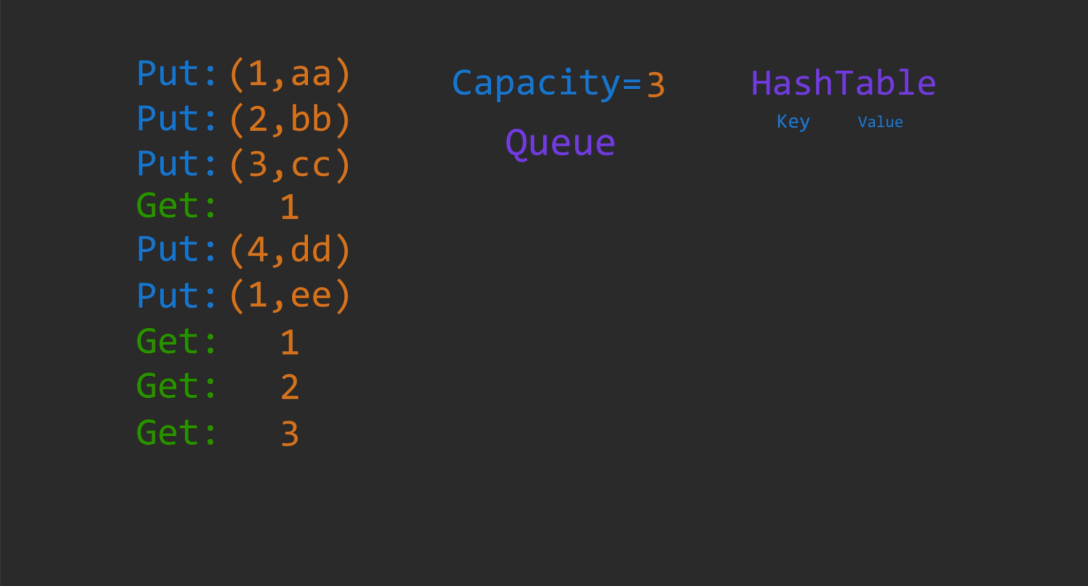

# 939. Minimum Area Rectangle
Given a set of points in the xy-plane, determine the minimum area of a rectangle formed from these points, with sides parallel to the x and y axes.

If there isn't any rectangle, return 0.

 

Example 1:

Input: [[1,1],[1,3],[3,1],[3,3],[2,2]]
Output: 4
Example 2:

Input: [[1,1],[1,3],[3,1],[3,3],[4,1],[4,3]]
Output: 2
 

Note:

1 <= points.length <= 500
0 <= points[i][0] <= 40000
0 <= points[i][1] <= 40000
All points are distinct.

## Approach 2: Count by Diagonal
Intuition

In order to form a rectangle, you need four points all positioned at 90 degrees to each other. 

For each pair of points in the array, consider them to be the long diagonal of a potential rectangle. We can check if all 4 points are there using a Set.

For example, if the points are (1, 1) and (5, 5), we check if we also have (1, 5) and (5, 1). If we do, we have a candidate rectangle.

Algorithm

In this approach, we store all given points in a set.

Then iteratively go through all the points in two loops (x1, y1) and (x2, y2) while checking if (x1, y2) and (x2, y1) are also valid points. If so, we found a rectangle.

We calculate the area of this rectangle. If this area is smaller than the minimum area seen so far, make it the minimum area.


In [1]:
def minAreaRect(points):
    res = float('inf')
    # put all points in set
    points_table = set(map(tuple,points))

    for x1,y1 in points:
        for x2,y2 in points:
            # Skip looking the same point
            if x1 > x2 and y1 > y2:
                if (x1,y2) in points_table and (x2,y1) in points_table:
                    area = abs(x1-x2) * abs(y1 -y2)
                    if area:
                        res = min(res,area)
    return res if res < float('inf') else 0

minAreaRect([[1,1],[1,3],[3,1],[3,3],[2,2]])

4

In [ ]:
# 15. 3Sum
Given an array nums of n integers, are there elements a, b, c in nums such that a + b + c = 0? Find all unique triplets in the array which gives the sum of zero.

Note:

The solution set must not contain duplicate triplets.

Example:

Given array nums = [-1, 0, 1, 2, -1, -4],

A solution set is:
[
  [-1, 0, 1],
  [-1, -1, 2]
]

In [2]:
def threeSum(nums):
    nums.sort()
    res = set()
    for i in range(len(nums)-2):
        if i > 0 and nums[i] == nums[i-1]: # remove dupplicate of target
            continue
        # using 2-sum 
        dict = {}
        target = 0 - nums[i]
        for x in nums[i+1:]:
            if x not in dict:
                dict[target - x] = 1
            else:
                res.add((-target,target - x, x))
    return map(list,res)

threeSum([-1,0,1,2,-1,-4])